#Neural network classification with pytroch

classificaation is a prooblem of predicting whether simethung is one thing or another ( there can be multiple things as the option)

#1, make some classificaion data

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.nn import BCEWithLogitsLoss
#make 1000 samples

n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

len(X) , len(y) # like features and labels

(1000, 1000)

In [ ]:
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

#we have 2 features corresponding with 1 LABEL
                #feature1(x1)  feature2(x2)
#so the sample [ 0.75424625  0.23148074] has label of 1 aand [ 0.44220765 -0.89672343] has label of 0 and other are like this accordingly


first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
#make a DataFrame of circle data

circles = pd.DataFrame({"X1 ": X[:,0],
                       "X2 ": X[:,1],
                       "label" :y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


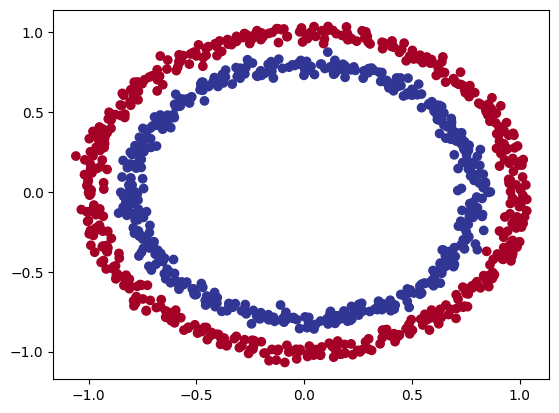

In [ ]:
#visulaize
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)

Note : The data we are working is often  referred as toy dataset , a dataset is small enough but stil sizeable enough to prsactice fundamentals

#1.1 check input and output shapes

In [ ]:
X.shape , y.shape
#(1000,2) means 1000 samples and has 2 features while y has 1000 samples but no features its just a simgle numbve or scalar

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"X_sample : {X_sample}")
print(f"y_sample : {y_sample}")

X_sample : [0.75424625 0.23148074]
y_sample : 1


#1.2 turn data into tenspr and create train and test splits

In [ ]:
X = torch.from_numpy(X).type(torch.float)
# X = X.type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5] , y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#split data into training and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,#20% of data will be for test and 80% for train
                                                  random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
X_train[:5] , y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#2.Builfing a model
to classify our blue and red dots

To do so we ant to :
1.setup device agnostic code so our code will run on GPU if there is one
2.construct a model (by subclasssing nn.Module)
3.define a loss function and optimizer
4.create a traimimg amd test loop

In [ ]:
import torch
from torch import nn

In [ ]:
#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#lets create a model that :

1.Subclasses `nn.Module`
2.Create 2 `nn.linear()` layers that are capable of handlung shapes of our data
3.Defines a `forward()` method that outlines the forward pass ( or forward computation )  
4.instantiate an instance of our model class and send it to the target device


In [ ]:
#1.construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):# its a constructor
    super().__init__()

    #2. create 2 nn.linear layers capable of handlig the shpes of our data....
    self.layer_1 = nn.Linear(in_features=2, # 2 as X has 2 features .....and there are 800 samples and each has 2 features i.e [0.9922 0.45747]
                            #  out_features=1) # we want to map 1 sample of X (having 2 features) with 1 sample of y
                                out_features=5) # so basically it takes 2 features and upscales to 5 feeatures

    # it will tak 2 features of X and perform nn.Linear function on it ( see the formula).....and then upscale it to 5 features
    #the more the hidden features the more the possibility of our model to learn more about hidden data ......so at begin it will learn on 2 feature then it will learn upto 5

    #but note that the shape of what is going out in layer_1 should be same shape as what is goinng "in" the layer_2

    self.layer_2 = nn.Linear(in_features=5, # in_feature of next layer should match the out_feature of previous layer
                             out_features=1) #takes in 5 feature from previous layer and outputs a single feature in output layer ( in same shape as y )

    #using it we can make layers well easily.....
    # self.two_linear_layers = nn.Sequential(
    #                 nn.Linear(in_features=2 ,  out_features=5),
    #                 nn.Linear(in_features=5 ,  out_features=1)
    #                 )


  #3. define a forward() method that outline our forward pass
  def forward(self,x): # it takes x as input as some form of data.....
    return self.layer_2(self.layer_1(x))
    # return self.two_linear_layers(x)

    # x goes into layer 1 , the o.p of layer_1 goes into layer 2 and then layer_2's o.p gets returned as output

#4. instantiate tan instance of our model class and send it to the target device

model_0  =CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#lets replicate the model above
model_0 = nn.Sequential(
   nn.Linear(in_features=2 ,  out_features=5),
   nn.Linear(in_features=5 ,  out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()
# its like weight has 2*5 = 10 samples

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
#make predictions

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"untrained_preds : {untrained_preds[:10]}")
print(f"y_test : {y_test[:10]}")

untrained_preds : tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
y_test : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#Setting up loss function and optimizer

we will use cross entropy loss for multi class clssification and binary cross entropy for binary class classsfification

In [ ]:
# setup loss funciton
#
# loss_fn = nn.BCELoss() # BCELoss = rewuires inputs to have gone throuhh thw signmoid activaton funciton proior ti the input to BCELoss.....its like below
  # nn.Sequential(
  #     nn.Sigmoid(),
  #     nn.BCELoss()
  # )

loss_fn=BCEWithLogitsLoss() # has sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), # optimizes model_0.parameters such that loss can go down using loss_fun
                            lr = 0.01)

In [ ]:
#calculate accuracy...which is.....true_positive/(true_positive+true_negative)*100

# like calculate accuracy - out of 100 samples  ,what percentage our model gets right ?

def accruacy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() # torch.eq() calculates how many of our y_true and y_pred samples are equal then sum them
  acc = (correct/len(y_pred))*100
  return acc

#3.Train our model with that 5 steps

#going raw logits - > prediction probabilities -> prediction tables

our model outputs are going to be raw `logits`

we can convert these **logits** into prediction probabilities by passing them to some kinf of activation funciton ( eg. sigmoid for biinart classification and softmax for multi-class classification)

Then we can convert our model prediction probabilities to prediction labels by either rounding the, or taking the `argmax()`

In [ ]:
# view the first 5 output s of thr forward pass on the test data

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))

y_logits[:5]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
#use the sigmoid aactiviation function on our logits ....which is ht eoutput activation function ......on our model to turn them into prediciotn probalities
y_pred_probs = torch.sigmoid(y_logits) # now we can pass them to torch.round function
y_pred_probs[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

FOr our prediciton probabilty values , we need to performa range-style rounfing on them ⁉
*`y_preds_probs`>= 0.5 , `y=1` (class 1)

*`y_preds_probs`< 0.5 , `y=0` (class 0)

In [ ]:
torch.round(y_pred_probs[:5])

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [ ]:
# find the predicted labels

y_preds = torch.round(y_pred_probs)

#in full  (logits -> pred probs -> pred labels)
# convetrted logits into pred probs using sigmoid and usinf round we cnverted pred pdobs into pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

#check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze())) # Changed squeezze() to squeeze()

#get rif og extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#3.2 Builing a training and testing loop

In [ ]:
torch.manual_seed(42)

epochs = 200

#put data to target device

X_train , y_train, X_test , y_test = X_train.to(device) , y_train.to(device) , X_test.to(device) , y_test.to(device)

#Build training and evaluation loop

for epoch in range (epochs):
  #training
  model_0.train()

  #1.forward pass
  y_logits = model_0(X_train).squeeze() # squeezw to get rid of extra 1 dimensioin from tensor

  y_pred = torch.round(torch.sigmoid(y_logits))

  # or we can use  y_pred = torch.round(torch.sigmoid(model_0(X_train).squeeze() )

  #2. calculate loss and accuracy ( well not necessary )

  # if loss function was BCELoss then woulf expect prediction probabilities as inputs....
  #loss =loss_fn(torch.sigmoid(y_logits),y_train)

  loss=loss_fn(y_logits,y_train) # compares y_logits with y_train and gives the loss .....nn.BCEWithlogitsLoss expects raw logits as inputs..whcih is basically PREDUCTION , TRUE LABELS comparision
  acc = accruacy_fn(y_true =y_train, y_pred=y_pred)


  #3. optimizer zero grad

  optimizer.zero_grad()

  #4.loss backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():

    #1.forawed pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2.calculate test loss and accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accruacy_fn(y_true=y_test,y_pred=test_pred)

  #print whats happening

  if epoch % 20 == 0:
    print(f"Epoch : {epoch} | loss : {loss:.5f} | acc : {acc:.2f}% | test_loss : {test_loss} | test_acc : {test_acc:.2f}%")



Epoch : 0 | loss : 0.69796 | acc : 51.88% | test_loss : 0.6945955753326416 | test_acc : 57.50%
Epoch : 20 | loss : 0.69742 | acc : 52.00% | test_loss : 0.6941847205162048 | test_acc : 57.50%
Epoch : 40 | loss : 0.69695 | acc : 51.62% | test_loss : 0.6938462853431702 | test_acc : 56.50%
Epoch : 60 | loss : 0.69656 | acc : 51.38% | test_loss : 0.6935670971870422 | test_acc : 56.00%
Epoch : 80 | loss : 0.69621 | acc : 51.25% | test_loss : 0.6933364868164062 | test_acc : 56.50%
Epoch : 100 | loss : 0.69592 | acc : 51.12% | test_loss : 0.693145751953125 | test_acc : 54.00%
Epoch : 120 | loss : 0.69567 | acc : 51.12% | test_loss : 0.6929877996444702 | test_acc : 52.50%
Epoch : 140 | loss : 0.69544 | acc : 51.38% | test_loss : 0.692857027053833 | test_acc : 52.00%
Epoch : 160 | loss : 0.69525 | acc : 51.38% | test_loss : 0.6927488446235657 | test_acc : 51.50%
Epoch : 180 | loss : 0.69507 | acc : 51.62% | test_loss : 0.6926593780517578 | test_acc : 52.00%


# 4. Make prediuctions and evvalutate the model


from the metrcis it looks like our model isnt learnign anything


so to inspea=ct it lets make some predicctions and make them visual

in other words VISUALIZE.

To do so we ware going to inport a funcion called `plot_decision_boundary`

In [ ]:
import requests

from pathlib import Path

#Downlaod heloer fntions form learn Pytotch rrepo (if tis not already donwlaoded)

if Path("helper_functions.py").is_file():
  print("helper_funcitns.py already exist , skipping download")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary ,plot_predictions

helper_funcitns.py already exist , skipping download


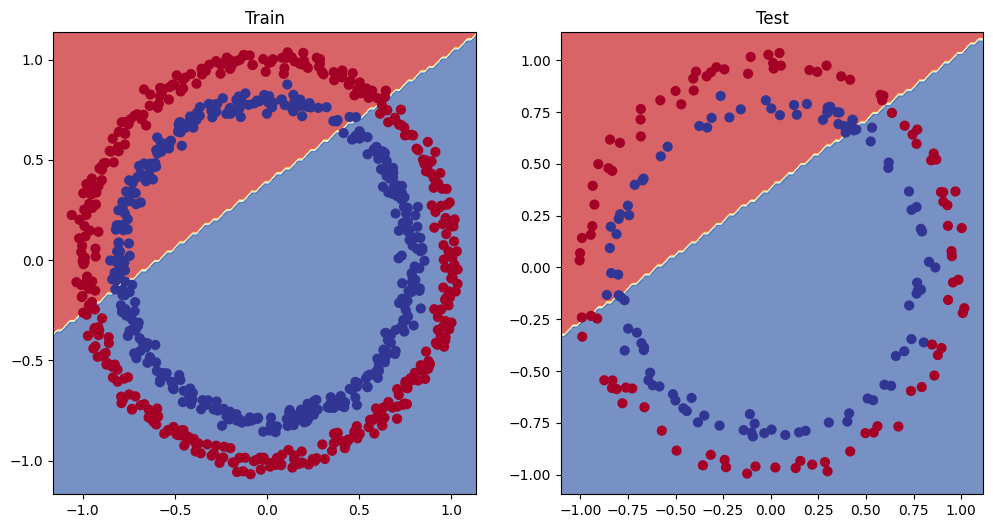

In [ ]:
#plot decisionn boundary of the mdodel

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

#5.Improving a model

* Add more layers  - give the model more chances to learn about patterns in data

* Add more hidden units- go from 5 hidden units to 10 hidden units

* Fit for longer

* Changing the activation function

* change the learning rate ( too large might explode the gradients )

* change the loss function

These optoins are all from a models perspective because they deal directly with the model , rather than the data

And because these options are all values we ( as ML engineers and data scientists ) can change , they are referred as **hyperParameters**

Lets try and improve our model by ⁉
  * adding more hideen units : 5->10
  * inc the number of layer : 2 -> 3
  * inc epochs : 100 - > 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



In [ ]:
torch.manual_seed(42)

epochs = 1000

#put data to target device

X_train , y_train, X_test , y_test = X_train.to(device) , y_train.to(device) , X_test.to(device) , y_test.to(device)

#Build training and evaluation loop

for epoch in range (epochs):
  #training
  model_1.train()

  #1.forward pass
  y_logits = model_1(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. calculate loss and accuracy ( well not necessary )

  loss=loss_fn(y_logits,y_train)
  acc = accruacy_fn(y_true =y_train, y_pred=y_pred)


  #3. optimizer zero grad

  optimizer.zero_grad()

  #4.loss backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():

    #1.forawed pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2.calculate test loss and accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accruacy_fn(y_true=y_test,y_pred=test_pred)


  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | loss : {loss:.5f} | acc : {acc:.2f}% | test_loss : {test_loss} | test_acc : {test_acc:.2f}%")


Epoch : 0 | loss : 0.69396 | acc : 50.88% | test_loss : 0.6926146149635315 | test_acc : 51.00%
Epoch : 100 | loss : 0.69305 | acc : 50.38% | test_loss : 0.6937903761863708 | test_acc : 48.00%
Epoch : 200 | loss : 0.69299 | acc : 51.12% | test_loss : 0.6943727731704712 | test_acc : 46.00%
Epoch : 300 | loss : 0.69298 | acc : 51.62% | test_loss : 0.6945767998695374 | test_acc : 45.00%
Epoch : 400 | loss : 0.69298 | acc : 51.12% | test_loss : 0.6946452260017395 | test_acc : 46.00%
Epoch : 500 | loss : 0.69298 | acc : 51.00% | test_loss : 0.6946679949760437 | test_acc : 46.00%
Epoch : 600 | loss : 0.69298 | acc : 51.00% | test_loss : 0.6946756839752197 | test_acc : 46.00%
Epoch : 700 | loss : 0.69298 | acc : 51.00% | test_loss : 0.6946782469749451 | test_acc : 46.00%
Epoch : 800 | loss : 0.69298 | acc : 51.00% | test_loss : 0.6946792006492615 | test_acc : 46.00%
Epoch : 900 | loss : 0.69298 | acc : 51.00% | test_loss : 0.6946794390678406 | test_acc : 46.00%


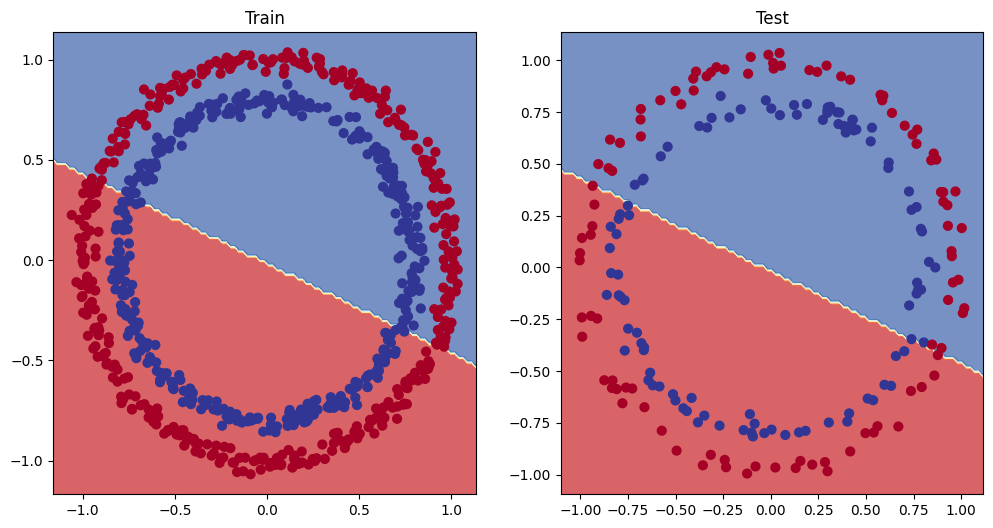

In [ ]:
#plot decisionn boundary of the mdodel

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

#5.1 Preparing data to see if out model can fit a straight line

one way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
weight = 0.7
bias = 0.3

start=0
end=1
step=0.01


X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))

X_train_reg = X_regression[:train_split]
y_train_reg = y_regression[:train_split]

print(len(X_regression),len(X_train_reg),len(y_train_reg))

X_test_reg = X_regression[train_split:]
y_test_reg = y_regression[train_split:]

print(len(X_test_reg))

100 80 80
20


In [ ]:
#create train and test splits

train_split = int(0.8 * len(X_regression))

X_train_regression = X_regression[:train_split]
y_train_regression = y_regression[:train_split]

print(len(X_regression),len(X_train_regression),len(y_train_regression))

X_test_regression = X_regression[train_split:]

y_test_regression = y_regression[train_split:]

print(len(X_test_regression),len(y_test_regression))



100 80 80
20 20


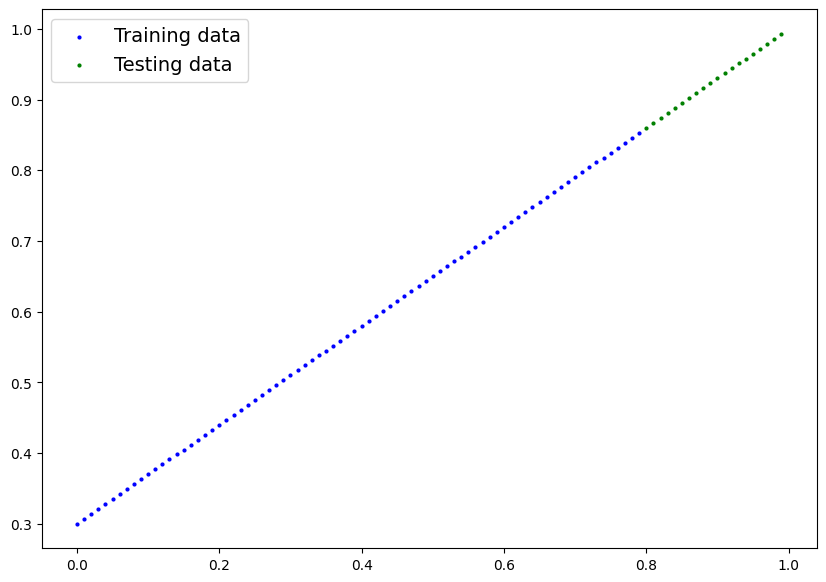

In [ ]:
plot_predictions(train_data=X_train_regression,
               train_labels=y_train_regression,
               test_data=X_test_regression,
               test_labels=y_test_regression,
               predictions=None);



In [ ]:
X_train_regression[:10]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [ ]:
model_1 # but this time we only have 1 feature per sample .....how do we know ?? we use X_train_regression.....
# so we have to adjust infeatures to 1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

#5.2 Adjusting `model_1` to fit a straight line

In [ ]:
#same architecture

model_2 =nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizwr

loss_fn = nn.L1Loss() # bcz we dealin with regresssion now as it is straight line not an classifiaction problem

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
#train it on train dataset and test it

torch.manual_seed(42)

epochs= 1000

X_train_regression , y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)

X_test_regression, y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  #1.forward pass
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred , y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

    #print whats happeining

    if epoch%100 == 0 :
      print(f"Epoch : {epoch} | loss : {loss:.5f} | test_loss : {test_loss}")

# so now we saw our model is learning something since loss is going down

Epoch : 0 | loss : 0.06455 | test_loss : 0.024250250309705734
Epoch : 100 | loss : 0.05296 | test_loss : 0.00773464422672987
Epoch : 200 | loss : 0.05297 | test_loss : 0.006133425049483776
Epoch : 300 | loss : 0.05887 | test_loss : 0.012628838419914246
Epoch : 400 | loss : 0.05555 | test_loss : 0.011045577935874462
Epoch : 500 | loss : 0.06256 | test_loss : 0.005609122104942799
Epoch : 600 | loss : 0.05861 | test_loss : 0.008644032292068005
Epoch : 700 | loss : 0.05845 | test_loss : 0.015133124776184559
Epoch : 800 | loss : 0.04373 | test_loss : 0.019775182008743286
Epoch : 900 | loss : 0.05337 | test_loss : 0.02988400124013424


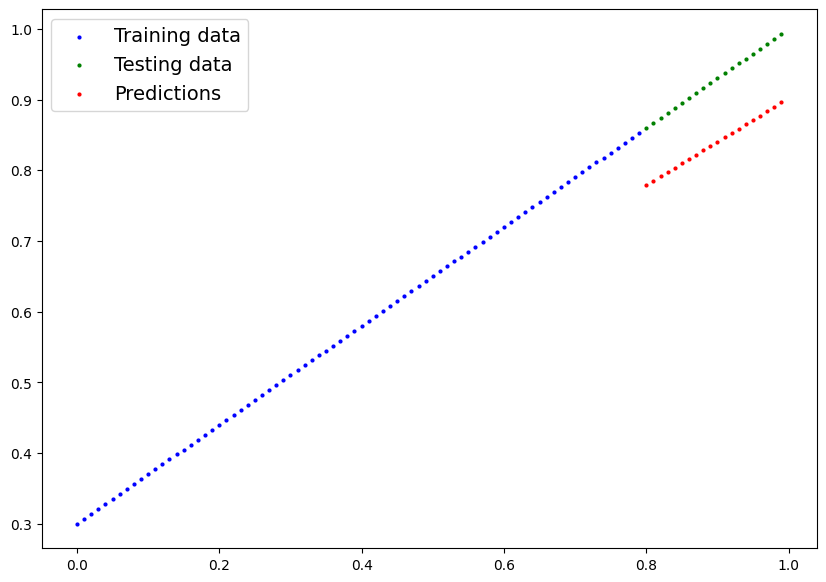

In [ ]:
#Turn on evaluation mode

model_2.eval()

#make prediction

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

  #plot the data and predictions
  # Changed train_label to train_labels, and test_label to test_labels
  plot_predictions(train_data = X_train_regression ,
                  train_labels = y_train_regression ,
                   test_data = X_test_regression ,
                   test_labels = y_test_regression,
                   predictions = y_preds
                   );

#6. The missing piece : non-linearity

"what patterns could you draw if u weere given an infinite amount of a straight and non straight lines ?"

or in a ML terms , an infinite but really its finite , of linear and non lineaer fnctions



#6.1 Recreating non - linear data (red and blue circles )

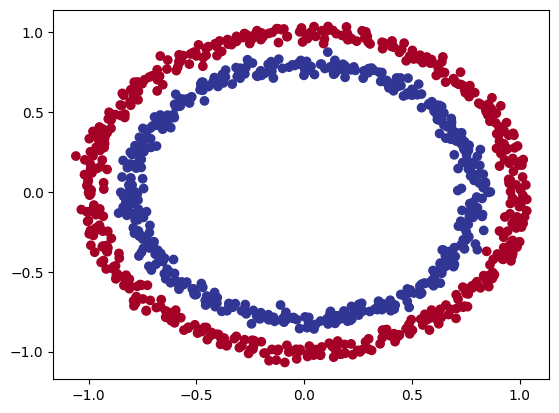

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
#cmap means colour map , cmap red yellow blue



In [ ]:
#convert data to tensor and then train and test split

import torch
from sklearn.model_selection import train_test_split

#turn data into tensors bcz we use tensors bcz we use tensor to train and test

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split into train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(len(X_train),len(X_test))

TypeError: expected np.ndarray (got Tensor)

##6.2 Building a model with non linearity


In [ ]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [ ]:
#Builf a model with non linear activation formulaa

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10) # we use 2 bc X_train has 2 features in each sample.....[ ] is called a sample and [ [],[],...[]  ] is called colectioin of samples
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() # our activation function , non linear activation function

    # relu takes an argument , and makes the o.p 0 if the o.p return by relu finction is -ve and doesnt do anything whenn the o.p returned by function is positive and returns the positive value as it is.....

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
##loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

#optimiser

optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr=0.1)

#6.3 training a model with non linearity



In [ ]:
#random seed
torch.manual_seed(42)


#device agnostic code
X_train , y_train, X_test , y_test = X_train.to(device) , y_train.to(device) , X_test.to(device) , y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  #forward pass
  y_logits = model_3(X_train).squeeze() # logits -> prediction probabilities -> prediction labels
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss  = loss_fn(y_logits , y_train ) #BCEWithLogitsLoss takes logits as first input

  #loss
  loss = loss_fn(y_logits,y_train)
  acc = accruacy_fn(y_true=y_train,y_pred=y_preds)

  #backpropogation
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_loss = loss_fn(test_logits ,y_test )
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_acc = accruacy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | loss : {loss:.5f} | acc : {acc:.2f}% | test_loss : {test_loss} | test_acc : {acc:.2f}%")


Epoch : 0 | loss : 0.01672 | acc : 99.88% | test_loss : 0.033626578748226166 | test_acc : 99.88%
Epoch : 100 | loss : 0.01578 | acc : 99.88% | test_loss : 0.03232044726610184 | test_acc : 99.88%
Epoch : 200 | loss : 0.01494 | acc : 100.00% | test_loss : 0.03116539865732193 | test_acc : 100.00%
Epoch : 300 | loss : 0.01418 | acc : 100.00% | test_loss : 0.030167322605848312 | test_acc : 100.00%
Epoch : 400 | loss : 0.01350 | acc : 100.00% | test_loss : 0.029262864962220192 | test_acc : 100.00%
Epoch : 500 | loss : 0.01288 | acc : 100.00% | test_loss : 0.028411712497472763 | test_acc : 100.00%
Epoch : 600 | loss : 0.01231 | acc : 100.00% | test_loss : 0.027495434507727623 | test_acc : 100.00%
Epoch : 700 | loss : 0.01180 | acc : 100.00% | test_loss : 0.02666389010846615 | test_acc : 100.00%
Epoch : 800 | loss : 0.01132 | acc : 100.00% | test_loss : 0.02589043788611889 | test_acc : 100.00%
Epoch : 900 | loss : 0.01089 | acc : 100.00% | test_loss : 0.02517171949148178 | test_acc : 100.00%


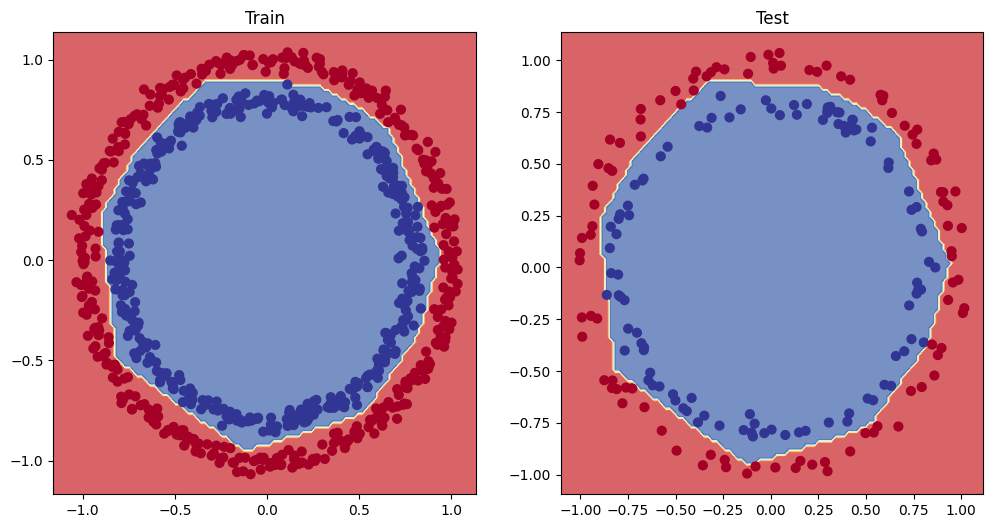

In [ ]:
#visualize

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

#7.Replicatig non linear activation functins

In [ ]:
#creating a tensor

A = torch.arange(-10 ,10 ,1 ,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

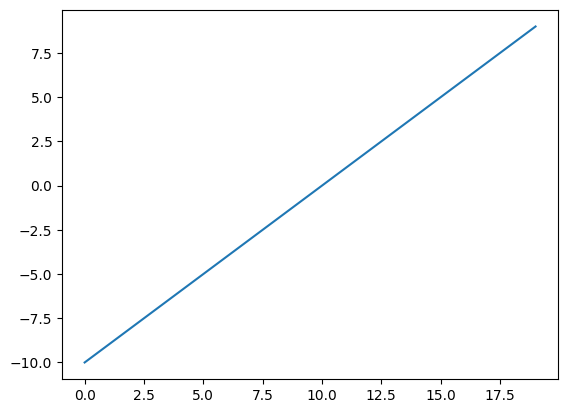

In [ ]:
plt.plot(A)

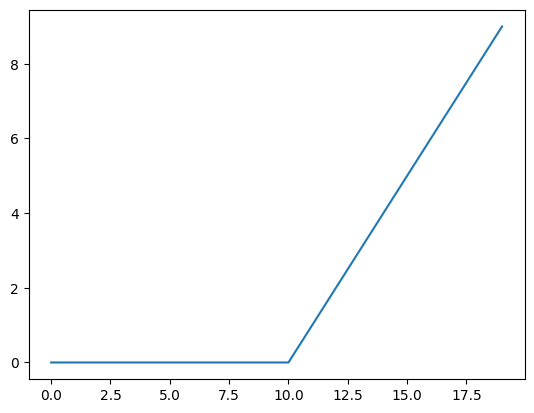

In [ ]:
plt.plot(torch.relu(A))

#there are 2-3 section remainning as daniel did model training on other type od datatypes too......